In [1]:
from deepforest import main
from deepforest import get_data
import os
import matplotlib.pyplot as plt

In [2]:
model = main.deepforest()

Reading config file: /Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/deepforest/data/deepforest_config.yml


/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
model.use_release()

Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


In [4]:
sample_image = get_data("OSBS_029.png")
sample_image

'/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/deepforest/data/OSBS_029.png'

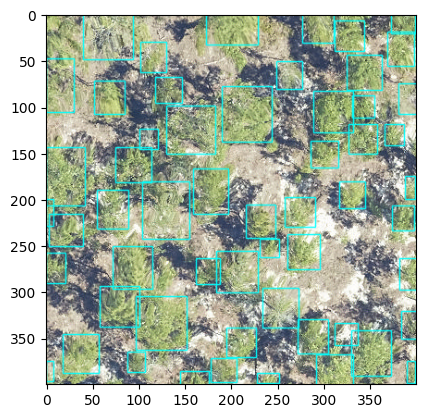

In [5]:
img = model.predict_image(path=sample_image,return_plot=True)

#predict_image returns plot in BlueGreenRed (opencv style), but matplotlib likes RedGreenBlue, switch the channel order.
plt.imshow(img[:,:,::-1])

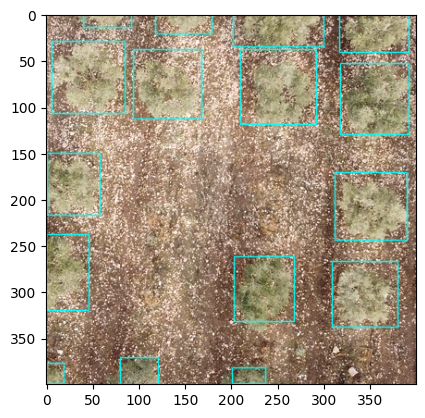

In [216]:
local_sample_path = '/Users/hakanonal/vscode/treecounter/data/geoCodedImgs/output_00230.tiff'
img = model.predict_image(path=local_sample_path,return_plot=True,thickness=1)

#predict_image returns plot in BlueGreenRed (opencv style), but matplotlib likes RedGreenBlue, switch the channel order.
plt.imshow(img[:,:,::-1])

In [101]:
boxes = model.predict_image(path=local_sample_path, return_plot = False)
boxes

,xmin,ymin,xmax,ymax,label,score,image_path
0,317.0,0.0,392.0,41.0,Tree,0.673003,output_00230.tiff
1,210.0,38.0,292.0,119.0,Tree,0.540903,output_00230.tiff
2,309.0,267.0,380.0,338.0,Tree,0.527135,output_00230.tiff
3,6.0,29.0,85.0,107.0,Tree,0.515489,output_00230.tiff
4,1.0,150.0,58.0,217.0,Tree,0.496148,output_00230.tiff
5,80.0,371.0,121.0,400.0,Tree,0.470361,output_00230.tiff
6,203.0,262.0,268.0,332.0,Tree,0.450764,output_00230.tiff
7,94.0,38.0,168.0,113.0,Tree,0.424160,output_00230.tiff
8,318.0,53.0,392.0,130.0,Tree,0.412961,output_00230.tiff
9,201.0,382.0,237.0,399.0,Tree,0.410188,output_00230.tiff


100%|██████████| 49/49 [02:08<00:00,  2.63s/it]

47 predictions in overlapping windows, applying non-max supression
30 predictions kept after non-max suppression


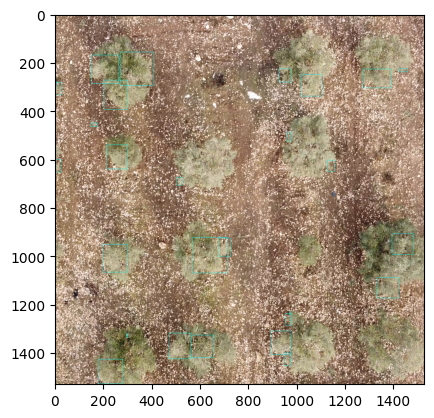

In [9]:
raster_path = '/Users/hakanonal/vscode/treecounter/data/geo.tiff'
predicted_raster = model.predict_tile(raster_path, return_plot = True, patch_size=300,patch_overlap=0.25)
plt.imshow(predicted_raster[:,:,::-1])

In [148]:
import rasterio

#img = get_data("OSBS_029.tif")
#img = "/Users/hakanonal/vscode/deepforest/data/s1.tif"
#img = "/Users/hakanonal/Downloads/temp_video_for_share.mp4"
#img = "/Users/hakanonal/vscode/treecounter/data/geo.tiff"
#img = "/Users/hakanonal/vscode/treecounter/data/geoCodedImgs/output_00230_pil.tiff"
#img = "/Users/hakanonal/vscode/treecounter/data/geoCodedImgs/output_00230.tiff"
img = "/Users/hakanonal/vscode/treecounter/data/temp_video_for_share/geoImgsPath/geo_00190.tiff"
r = rasterio.open(img)
transform = r.transform 
crs = r.crs
print(crs)

EPSG:4326


In [149]:
from deepforest import utilities

m = main.deepforest()
m.use_release(check_release=False)
df = m.predict_image(path=img)
gdf = utilities.annotations_to_shapefile(df, transform=transform, crs=crs)

Reading config file: /Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/deepforest/data/deepforest_config.yml


/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/deepforest/utilities.py:431: UserWarning: This method is deprecated and will be removed in version DeepForest 2.0.0, please use boxes_to_shapefile which unifies project_boxes and annotations_to_shapefile functionalities
  warnings.warn("This method is deprecated and will be removed in version DeepForest 2.0.0, please use boxes_to_shapefile which unifies project_boxes and annotations_to_shapefile functionalities")


In [150]:
gdf

,xmin,ymin,xmax,ymax,label,score,image_path,geometry
0,102.0,0.0,161.0,40.0,Tree,0.710628,geo_00190.tiff,"POLYGON ((151.64560 27.67750, 151.64560 -0.322..."
1,292.0,0.0,335.0,19.0,Tree,0.668308,geo_00190.tiff,"POLYGON ((273.44560 27.67750, 273.44560 14.377..."
2,179.0,0.0,244.0,35.0,Tree,0.432220,geo_00190.tiff,"POLYGON ((209.74560 27.67750, 209.74560 3.1775..."
3,21.0,125.0,51.0,156.0,Tree,0.400379,geo_00190.tiff,"POLYGON ((74.64560 -59.82250, 74.64560 -81.522..."
4,376.0,0.0,400.0,9.0,Tree,0.350064,geo_00190.tiff,"POLYGON ((318.94560 27.67750, 318.94560 21.377..."
5,202.0,81.0,249.0,128.0,Tree,0.315052,geo_00190.tiff,"POLYGON ((213.24560 -29.02250, 213.24560 -61.9..."
6,119.0,193.0,160.0,235.0,Tree,0.269201,geo_00190.tiff,"POLYGON ((150.94560 -107.42250, 150.94560 -136..."
7,381.0,164.0,400.0,203.0,Tree,0.249648,geo_00190.tiff,"POLYGON ((318.94560 -87.12250, 318.94560 -114...."
8,205.0,272.0,259.0,329.0,Tree,0.219552,geo_00190.tiff,"POLYGON ((220.24560 -162.72250, 220.24560 -202..."
9,117.0,109.0,155.0,146.0,Tree,0.218835,geo_00190.tiff,"POLYGON ((147.44560 -48.62250, 147.44560 -74.5..."


In [151]:
gdf.total_bounds

array([  53.6456, -251.6225,  318.9456,   27.6775])

In [111]:
gdf.crs

<Derived Projected CRS: EPSG:32617>
Name: WGS 84 / UTM zone 17N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 17N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [117]:
print(gdf['geometry'][0])

POLYGON ((404249.25 3285108.6500000004, 404249.25 3285103.7500000005, 404244.95 3285103.7500000005, 404244.95 3285108.6500000004, 404249.25 3285108.6500000004))


In [ ]:
import ffmpeg
ffmpeg.probe("/Users/hakanonal/Downloads/temp_video_for_share.mp4")

In [ ]:
import subprocess

# init command
ffmpeg_command = ["ffmpeg", "-i","~/Downloads/temp_video_for_share.mp4", "-map", "0:s:0", "data/subs.srt", "pipe:1"]

# excute ffmpeg command
pipe = subprocess.run(ffmpeg_command,
                    stdout=subprocess.PIPE,
                    stderr=subprocess.PIPE,
                    bufsize=10**8)

# debug
print(pipe.stdout, pipe.stderr)



In [ ]:
import ffmpeg
ffmpeg.input("/Users/hakanonal/Downloads/temp_video_for_share.mp4").output("data/subs.srt", map = "0:s:0").run(overwrite_output=True)


In [95]:
import ffmpeg
ffmpeg.input("/Users/hakanonal/Downloads/temp_video_for_share.mp4").output("data/imgsFromVid/output_%05d.png",vf='crop=ih:ih,scale=400:-1',r=1).run(overwrite_output=True)

ffmpeg version N-109428-g10a56363a7-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static

(None, None)

I've asked to chatGPT:
can you write me a code that creates geotiff from a png file and text? Here it is...

In [ ]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.crs import CRS
from PIL import Image
import numpy as np

# Open the PNG file as an image
png = Image.open('data/imgsFromVid/output_00251.png')

# Extract the width and height of the image
width, height = png.size

crs = CRS.from_epsg(4326)
#left=28.0271
#top=38.5954
left, top, right, bottom = png.getbbox()
left, bottom, right, top = map(int, (left, bottom, right, top))

# Set the metadata for the GeoTIFF
meta = {
    'driver': 'GTiff',
    'dtype': 'uint8',
    'nodata': 0,
    'width': width,
    'height': height,
    'count': 3,
    'crs': CRS.from_epsg(4326),  # Set the coordinate reference system (CRS) to WGS 84 (EPSG: 4326)
    'transform': calculate_default_transform(dst_crs= CRS.from_epsg(4326), src_crs=  CRS.from_epsg(4326), width= width, height= height, left=0,right=1,top=0,bottom=1)
}

# Create a new GeoTIFF file
with rasterio.open('data/firstGeo.tiff', 'w', **meta) as dst:
    # Convert the PNG image to a NumPy array
    png_array = np.asarray(png)

    # Write the text to the GeoTIFF
    dst.write(png_array)


In [ ]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.crs import CRS
from PIL import Image
import numpy as np

# Open the PNG file as an image
png = Image.open('data/imgsFromVid/output_00251.png')
width, height = png.size
crs = CRS.from_epsg(4326)
left, top, right, bottom = png.getbbox()
left, bottom, right, top = map(int, (left, bottom, right, top))
print(left)
print(top)
print(right)
print(bottom)
print(width)
print(height)


In [ ]:
transform = calculate_default_transform(dst_crs= CRS.from_epsg(4326), src_crs=  CRS.from_epsg(4326), width= width, height= height, left=0,right=height,top=0,bottom=width)
transform

Finally I've asked the correct question and got the answer incouple of iterations:
```
instead of transforming can I directly write the latitude and longitude statically on a non geo coded image simple plain image?
```

In [272]:
import rasterio
from rasterio.transform import from_origin
from rasterio.windows import Window
from rasterio.enums import Resampling

def geoCodeImage(inputFileName,latidute,longitude):
    src = rasterio.open('data/imgsFromVid/%s.png'%inputFileName)
    width, height = src.width, src.height
    size = min(width, height)
    pixel_size = 0.00000035
    x_origin = latidute - ((size-1) * pixel_size)
    y_origin = longitude + ((size-1) * pixel_size)
    transform = from_origin(x_origin, y_origin, pixel_size, pixel_size)  # Set the latitude and longitude coordinates as the origin
    crs = rasterio.crs.CRS.from_epsg(4326)  # Set the CRS to EPSG: 4326 (WGS 84)

    # Set the metadata for the GeoTIFF
    meta = {
        'driver': 'GTiff',
        'dtype': 'uint8',
        'nodata': 0,
        'width': size,
        'height': size,
        'count': 3,
        'crs': crs,
        'transform': transform
    }

    # Create the GeoTIFF file
    with rasterio.open('data/geoCodedImgs/%s.tiff'%inputFileName, 'w', **meta) as dst:
        x_offset = (width - size) // 2
        y_offset = (height - size) // 2
        window = Window(x_offset, y_offset, size, size)

        # Copy the data from the source image to the GeoTIFF
        dst.write(src.read(window=window))

    src.close()

In [273]:
geoCodeImage("output_00230",28.0271,38.5950)

/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [48]:
from PIL import Image

def generateGeoCodedTiffWithPIL(inputFileName,latidute,longitude,resolution):
    # Open the PNG image
    img = Image.open('data/imgsFromVid/%s.png'%inputFileName)

    width, height = img.size

    if width > height:
        left = (width - height) / 2
        top = 0
        right = (width + height) / 2
        bottom = height
    else:
        left = 0
        top = (height - width) / 2
        right = width
        bottom = (height + width) / 2
    img = img.crop((left, top, right, bottom))
    img = img.resize((resolution,resolution))

    # Save the resized image as a GeoTIFF file
    img.save('data/geoCodedImgs/%s_pil.tiff'%inputFileName, format="TIFF", dtype=float,  geotransform=(longitude,resolution,0, latidute,0, -resolution))
    
generateGeoCodedTiffWithPIL('output_00230',28.0271,38.5954,400)


In [274]:
from deepforest import main
from deepforest import utilities
import rasterio

path = 'data/geoCodedImgs/%s.tiff'%"output_00230"
r = rasterio.open(path)
transform = r.transform 
crs = r.crs
r.close()

m = main.deepforest()
m.use_release(check_release=False)
df = m.predict_image(path=path)
gdf = utilities.annotations_to_shapefile(df, transform=transform, crs=crs)
gdf

Reading config file: /Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/deepforest/data/deepforest_config.yml


/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/deepforest/utilities.py:431: UserWarning: This method is deprecated and will be removed in version DeepForest 2.0.0, please use boxes_to_shapefile which unifies project_boxes and annotations_to_shapefile functionalities
  warnings.warn("This method is deprecated and will be removed in version DeepForest 2.0.0, please use boxes_to_shapefile which unifies project_boxes and annotations_to_shapefile functionalities")


,xmin,ymin,xmax,ymax,label,score,image_path,geometry
0,317.0,0.0,392.0,41.0,Tree,0.673003,output_00230.tiff,"POLYGON ((28.02710 38.59514, 28.02710 38.59513..."
1,210.0,38.0,292.0,119.0,Tree,0.540903,output_00230.tiff,"POLYGON ((28.02706 38.59513, 28.02706 38.59510..."
2,309.0,267.0,380.0,338.0,Tree,0.527135,output_00230.tiff,"POLYGON ((28.02709 38.59505, 28.02709 38.59502..."
3,6.0,29.0,85.0,107.0,Tree,0.515489,output_00230.tiff,"POLYGON ((28.02699 38.59513, 28.02699 38.59510..."
4,1.0,150.0,58.0,217.0,Tree,0.496148,output_00230.tiff,"POLYGON ((28.02698 38.59509, 28.02698 38.59506..."
5,80.0,371.0,121.0,400.0,Tree,0.470361,output_00230.tiff,"POLYGON ((28.02700 38.59501, 28.02700 38.59500..."
6,203.0,262.0,268.0,332.0,Tree,0.450764,output_00230.tiff,"POLYGON ((28.02705 38.59505, 28.02705 38.59502..."
7,94.0,38.0,168.0,113.0,Tree,0.424160,output_00230.tiff,"POLYGON ((28.02702 38.59513, 28.02702 38.59510..."
8,318.0,53.0,392.0,130.0,Tree,0.412961,output_00230.tiff,"POLYGON ((28.02710 38.59512, 28.02710 38.59509..."
9,201.0,382.0,237.0,399.0,Tree,0.410188,output_00230.tiff,"POLYGON ((28.02704 38.59501, 28.02704 38.59500..."


In [252]:
print(gdf['geometry'][0])

POLYGON ((28.027257000000002 38.5949998, 28.027257000000002 38.5949834, 28.027227 38.5949834, 28.027227 38.5949998, 28.027257000000002 38.5949998))


In [255]:
[(i[1],i[0]) for i in list(gdf['geometry'][0].exterior.coords)][:-1]

[(38.5949998, 28.027257000000002),
 (38.5949834, 28.027257000000002),
 (38.5949834, 28.027227),
 (38.5949998, 28.027227)]

In [ ]:
import os

example_paths = [
    "FileName", 
    "./FileName",
    "../../FileName",
    "FileName.txt", 
    "./FileName.txt.zip.asc",
    "/path/to/some/FileName",
    "/path/to/some/FileName.txt",
    "/path/to/some/FileName.txt.zip.asc"
]

for example_path in example_paths:
    print(os.path.basename(example_path).split('.')[0])

In [13]:
import re
import pandas as pd

class SrtParser:
    def __init__(self,path):
        self.path = path
        file_to_read = open(path,'r')
        self.data = file_to_read.read()
        file_to_read.close()
        self.subtitles = pd.DataFrame(columns=['index','start','end','text','latitude','longitude','distance','height','horizontal_speed','vertical_speed'])

    def parseTime(self,time_str):
        # Extract hours, minutes, and seconds from the time string
        hours, minutes, seconds_milliseconds = time_str.split(':')
        seconds, milliseconds = seconds_milliseconds.split(',')
        
        # Convert hours, minutes, and seconds to integers
        hours = int(hours)
        minutes = int(minutes)
        seconds = int(seconds)
        milliseconds = int(milliseconds)
        
        # Return the total number of milliseconds
        return (hours * 3600 + minutes * 60 + seconds) * 1000 + milliseconds


    def parseSubtitle(self,subtitle_str):
        # Split the subtitle string into lines
        lines = subtitle_str.strip().split('\n')
        
        # Extract the index, start, and end times from the first line
        index = int(lines[0])
        start, end = map(self.parseTime, lines[1].split(' --> '))
        
        # Join the remaining lines into a single string
        text = '\n'.join(lines[2:])
        
        # Create and return a Subtitle object
        new_subtitle = pd.DataFrame.from_dict({
            'index': [index],
            'start': [start],
            'end': [end],
            'text': [text],
            'longitude': [float(text.split(',')[4].lstrip('GPS ('))],
            'latitude': [float(text.split(',')[5])],
            'distance': [float(text.split(',')[7].lstrip('D ').rstrip('m'))],
            'height': [float(text.split(',')[8].lstrip('H ').rstrip('m'))],
            'horizontal_speed': [float(text.split(',')[9].lstrip('H.S ').rstrip('m/s'))],
            'vertical_speed': [float(text.split(',')[10].lstrip('V.S ').rstrip('m/s'))]
        })
        self.subtitles = pd.concat([self.subtitles,new_subtitle],ignore_index=True)

    def parseSrt(self,srt_str):
        # Split the srt string into a list of subtitle strings
        subtitles = re.split('\n\n+', srt_str.strip())
        
        # Parse each subtitle string and return a list of Subtitle objects
        for subtitle in subtitles:
            self.parseSubtitle(subtitle)
        return self.subtitles
    
    def parse(self):
        return self.parseSrt(self.data)

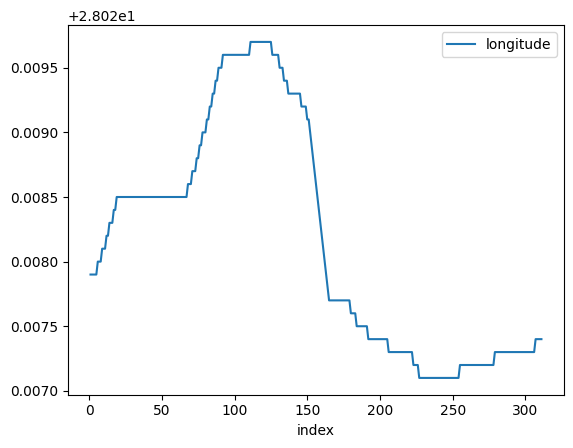

In [14]:
import matplotlib.pyplot as plt

parser = SrtParser("/Users/hakanonal/vscode/treecounter/data/subs.srt")
subtitles = parser.parse()
subtitles.plot(x='index',y='longitude',kind='line')
plt.show()

In [275]:
import folium

# Define the coordinates of the polygon
#polygon_coords = [(150.9456, -107.4225), (150.9456, -136.8225), (122.2425, -136.8225), (150.9456, -107.4225)]
#polygon_coords = [(404249.25, 3285108.6500), (404249.25, 3285103.7500), (404244.95, 3285103.75000), (404244.95, 3285108.65000)]
polygon_coords1 = [(38.5954,28.0271), (38.5954,28.0272), (38.5955,28.0272),(38.5955,28.0271)]
polygon_coords2 = [(38.59560,28.02750)]
polygon_coords3 = [(38.59561,28.02751)]
polygon_coords4 = [(38.59570,28.02760),(38.59570,28.02764),(38.59574,28.02764),(38.59574,28.02760)]


# Create a map
mapbox_username = 'hakanonal'
mapbox_style_id = 'cld1cw3p2000m01qpv54eq0s9'
mapbox_accesstoken = 'pk.eyJ1IjoiaGFrYW5vbmFsIiwiYSI6ImNsZDFkM2x6YTI1ZGkzd252M215c2JsdngifQ.CaALt9Cl_z8Mq-Z-ltm_rw'
m = folium.Map(
    tiles='https://api.mapbox.com/styles/v1/%s/%s/tiles/256/{z}/{x}/{y}@2x?access_token=%s'%(mapbox_username,mapbox_style_id,mapbox_accesstoken),
    attr='Mapbox attribution',
    name='Mapbox Satellite',
    zoom_start=1,
    access_token=mapbox_accesstoken)

# Add the polygon to the map
p1 = folium.Polygon(polygon_coords1, color="red", fill=True)
p1.add_to(m)

p2 = folium.Polygon(polygon_coords2, color="red", fill=True)
p2.add_to(m)

p3 = folium.Polygon(polygon_coords3, color="red", fill=True)
p3.add_to(m)

p4 = folium.Polygon(polygon_coords4, color="red", fill=True)
p4.add_to(m)

for index, row in gdf.iterrows():
    folium.Polygon([(i[1],i[0]) for i in list(row['geometry'].exterior.coords)][:-1], color="green", fill=True).add_to(m)


# Fit the map to the polygon bounds
m.fit_bounds(p1.get_bounds())

# Display the map
m
